# ELECTRIC BILL PREDICTION USING LINEAR REGRESSION


# ⚡️ INTRODUCTION

Welcome! In this notebook, we’ll use a machine learning model to **predict electricity bills** based on household appliance usage.

### 🧠 Why This Matters
Energy bills are a major part of monthly expenses. Understanding how much your bill might be — before it arrives — can help you:

- Plan your usage better 💡  
- Save money 💰  
- Track which appliances impact your bill the most 🧺

This notebook walks you through the **complete process** in a way that’s simple, even if you’re new to machine learning.




#  Importing Libraries & Loading Data

We begin by importing the essential Python libraries for data manipulation, visualization, and machine learning. `pandas` and `numpy` are used for handling data structures and numerical operations, while `matplotlib`, `seaborn`, and `plotly` provide tools for visualizing distributions and model outputs. We also load `sklearn` tools for training, evaluating, and validating a regression model.

Once the libraries are loaded, we upload our dataset (in `.csv` format) and store it in a DataFrame for analysis.


In [2]:
# 📚 Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# 📂 Upload CSV
from google.colab import files
uploaded = files.upload()

Saving electricity_bill_dataset.csv to electricity_bill_dataset.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded[next(iter(uploaded))]))

🟧 **Preparing the Data for Machine Learning**

Before training a model, we have to prepare the data in a way it understands. This means:

Making sure all inputs are numerical

Filling or removing missing values

Separating the data into features (what we know) and target (what we want to predict)

Think of this as preparing a clean recipe before we actually start cooking.



In [4]:

print("Shape:", df.shape)
print("\nColumns:\n", df.columns)




Shape: (45345, 12)

Columns:
 Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'MotorPump', 'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

Missing values:
 Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64

Data types:
 Fan                  int64
Refrigerator       float64
AirConditioner     float64
Television         float64
Monitor            float64
MotorPump            int64
Month                int64
City                object
Company             object
MonthlyHours         int64
TariffRate         float64
ElectricityBill    float64
dtype: object


,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [25]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


In [29]:
print(" no of duplicates",df.duplicated().sum())

duplicates 0


In [26]:
print("\nData types:\n", df.dtypes)


Data types:
 Fan                  int64
Refrigerator       float64
AirConditioner     float64
Television         float64
Monitor            float64
MotorPump            int64
Month                int64
City                object
Company             object
MonthlyHours         int64
TariffRate         float64
ElectricityBill    float64
dtype: object


In [27]:
display(df.head())

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [28]:
df.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.0,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,0.0,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,0.0,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,0.0,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,0.0,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,0.0,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,0.0,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,0.0,12.000000,926.000000,9.300000,8286.300000


This  cells helps us to get a feel of our dataset with various functions like:

* Shape which gives us the no of rows and columns

* Columns which gives us the names of all the columns

* Checking the no of duplicate values

* Isnull.sum() which gives us the total no of missing values for each column\

* Dtypes gives us the type of each column which will help us in our label encoding later


# 🟩 Exploring the Data (EDA)


Now that we’ve loaded the data, it’s time to explore it — this step is like asking the data to “tell us about itself.”

Here’s what we’re looking for:

Which appliances are used the most?

Is there a clear link between usage and bill amount?

Are there any unusual values (like extremely high or missing ones)?

How strong is the correlation between each input and the final bill?

By doing this, we’re trying to answer:
“Which features matter most when it comes to predicting your bill?”

We also visualize this using heatmaps and plots to spot strong relationships easily.

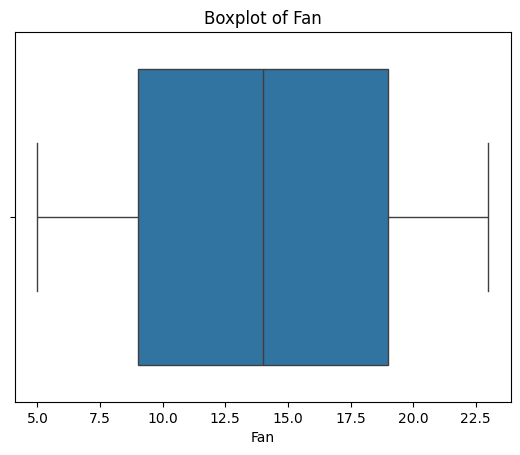

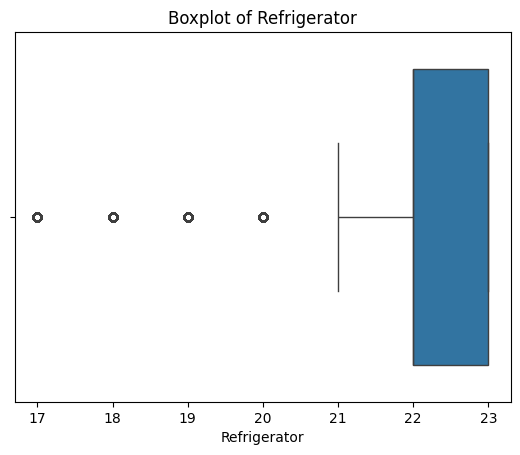

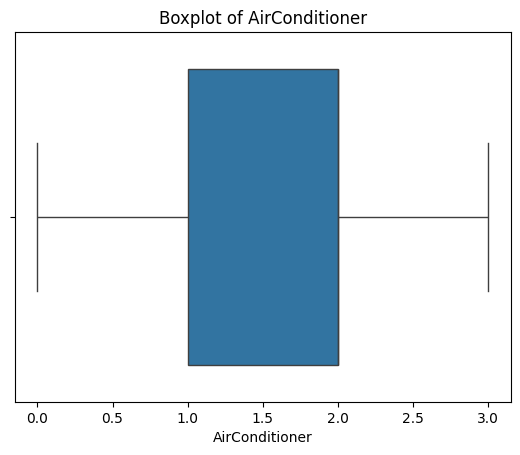

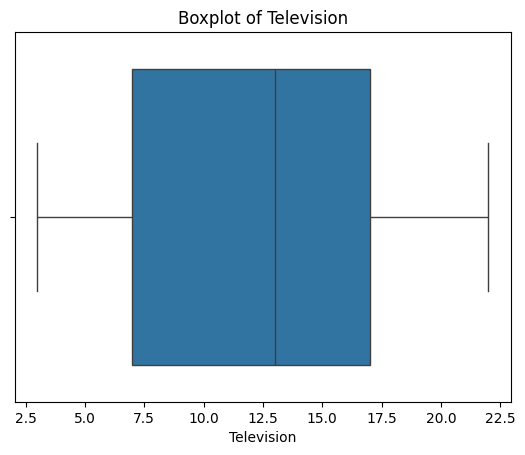

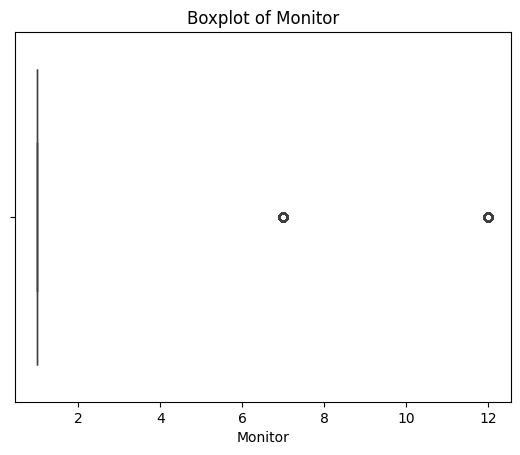

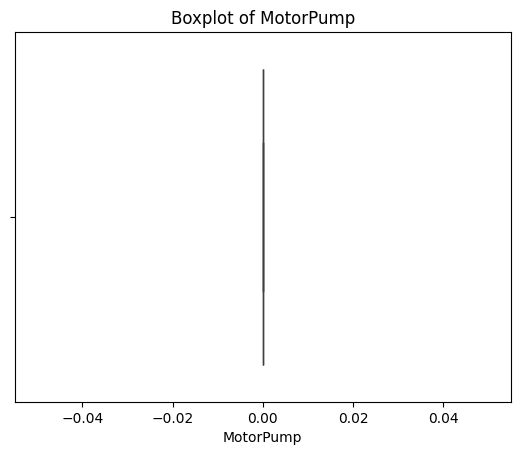

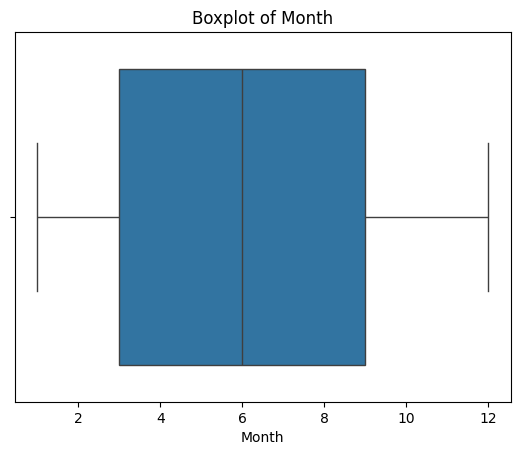

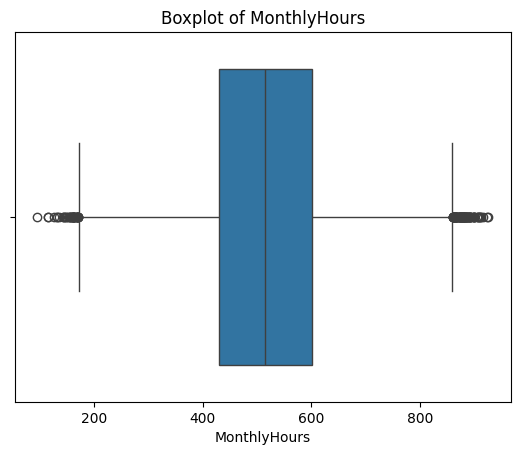

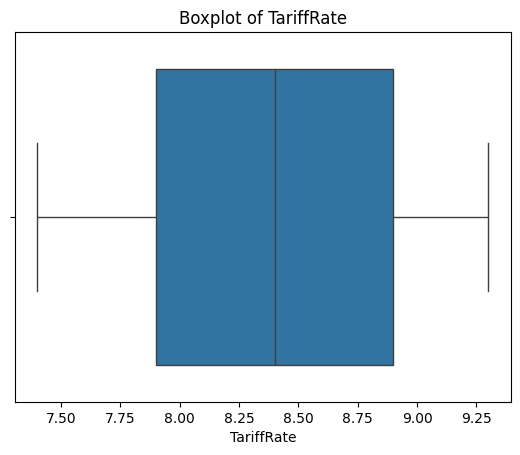

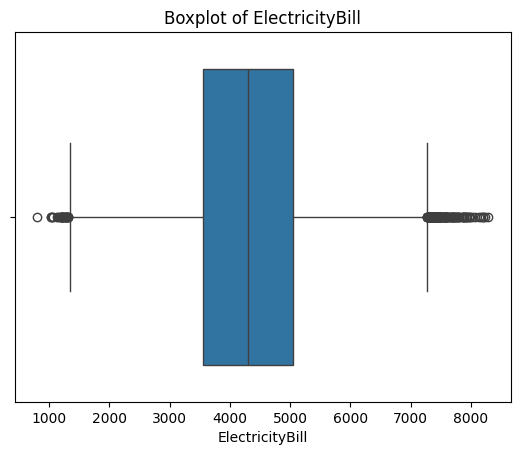

In [5]:
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


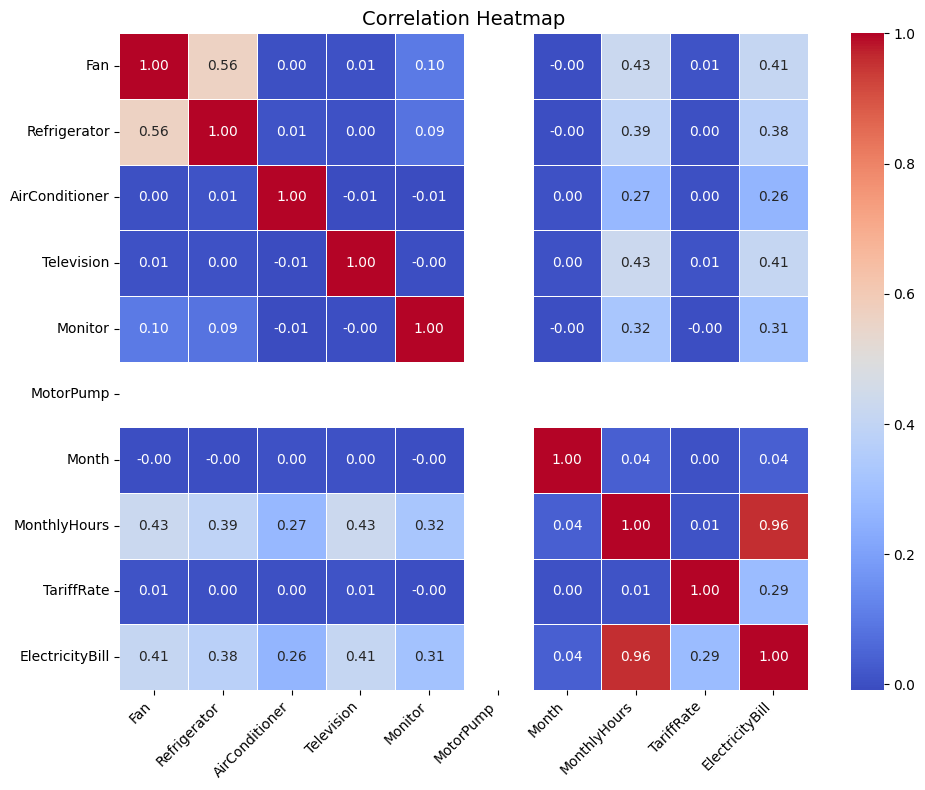

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for all numeric features
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()




/tmp/ipython-input-31-473566287.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




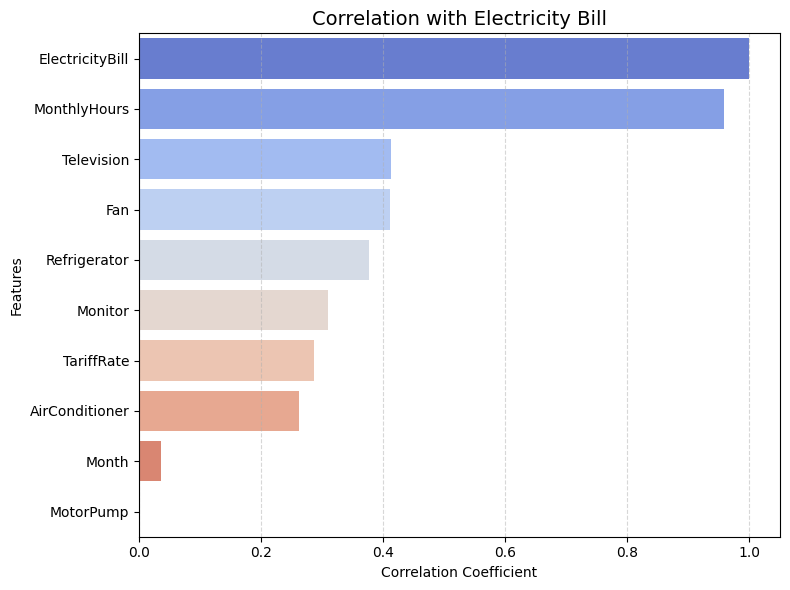

In [31]:
# Correlation with target variable only - horizontal bar plot
target_corr = df.corr(numeric_only=True)['ElectricityBill'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='coolwarm')
plt.title('Correlation with Electricity Bill', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [8]:
df.corr(numeric_only=True)['ElectricityBill'].sort_values(ascending=False)


,ElectricityBill
ElectricityBill,1.000000
MonthlyHours,0.958702
Television,0.412651
Fan,0.410682
Refrigerator,0.376816
Monitor,0.309986
TariffRate,0.286226
AirConditioner,0.261845
Month,0.036316
MotorPump,NaN




The goal of EDA is to understand the structure, quality, and distribution of the dataset. This includes:

- **Checking data types** and identifying missing values using `.info()` and `.isnull()`.
- **Summarizing numerical columns** using `.describe()` to see central tendency and spread.
- **Visualizing the distribution** of the target variable (`ElectricityBill`) to detect skewness or outliers.
- **Boxplots** and **scatter plots** to identify trends, variability, and unusual values across features.
- **Correlation heatmaps** to understand the linear relationships between features and the target.

This step helps us spot redundant or irrelevant variables, discover potential transformations, and guide feature selection.


**Post label encoding,the dataset is now in a format that can be understood by the model we are going to use**



In [12]:
X = df.drop(['ElectricityBill','Month','Company','City','TariffRate'], axis=1)
y = df['ElectricityBill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**I have removed some columns from the predictive features as their correlation is too low which gives leads to more noise and overfitting.**

In [17]:
from sklearn.preprocessing import LabelEncoder
for col in X.columns:
    if X[col].dtype == 'object':  # If it's a text column
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

display(X.head())

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,MonthlyHours
0,16,23.0,2.0,6.0,1.0,0,384
1,19,22.0,2.0,3.0,1.0,0,488
2,7,20.0,2.0,6.0,7.0,0,416
3,7,22.0,3.0,21.0,1.0,0,475
4,11,23.0,2.0,11.0,1.0,0,457



Now:

We split the data into two parts:

**Training data**: To teach the model.

**Testing data**: To check how well the model learned.

test_size=0.2 means 20% of the data is used for testing, 80% for training.

random_state=42 makes the split repeatable (like some sort of a secret code).

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop text columns if not encoded
X = df.drop(['ElectricityBill', 'Month', 'City', 'Company'], axis=1)
y = df['ElectricityBill']

# ✅ Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize model
model = LinearRegression()

# ✅ Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_root_mean_squared_error')
print("Cross-validated RMSE (5 folds):", -np.mean(cv_scores))

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)




Cross-validated RMSE (5 folds): 70.772323155203


# **🟪MODEL EVALUATION**
After training, we test the model by giving it new (unseen) data and asking it to predict the bill.

Then we compare:

🔹 How close are the predicted bills to the real ones?

🔹 Is the model accurate or just guessing?

We use two simple metrics:

Mean Squared Error (MSE): How far off, on average, the predictions are

R² Score: How well the model explains the variation in the actual bill

A good model will have:

Low MSE

R² close to 1.0

That means it predicts bills quite accurately.

In [21]:

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)
print("Model Coefficients:", model.coef_)


results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

fig = px.scatter(results, x="Actual", y="Predicted", title="Actual vs Predicted Electricity Bill")
fig.add_shape(
    type="line",
    x0=results["Actual"].min(), x1=results["Actual"].max(),
    y0=results["Actual"].min(), y1=results["Actual"].max(),
    line=dict(color="green", dash="dash")
)
fig.update_layout(xaxis_title="Actual Bill", yaxis_title="Predicted Bill")
fig.show()


Mean Squared Error: 4969.580919656902
R-squared Score: 0.9956384956127871
Model Coefficients: [-2.17653564e-01  8.13454653e-01  1.63135041e-01 -5.74909561e-01
  1.89863218e-01  2.84217094e-14  1.02620307e+03  2.97248272e+02]


I used plotly for its more interactive and detailed nature which will help us to get a more holistic viewpoint of how our model predicts.

# **📊 How Well Did Our Predictions Work?**

After training the model, we tested it to see how accurately it could predict electricity bills for new, unseen data.






🔹 Mean Squared Error (MSE): 4969.58

This value tells us how far off the model's predictions are from the actual bill amounts, on average (squared to penalize big mistakes).

While it's not in exact currency, the number gives us a sense of the model’s error.

What this means:
The model’s predictions are reasonably close to the real values. A lower MSE is better, and this score is quite acceptable given the bill amounts involved.












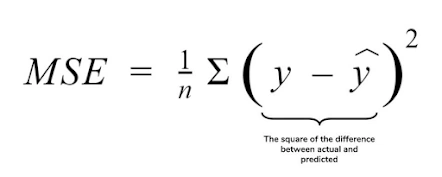

🔹 R-squared Score (R²): 0.9956
This score shows how well the model explains the variation in electricity bills.

A perfect score is 1.0

Our model scored 0.9956, which means it explains 99.56% of the variation

In simple terms:
The model has learned the patterns in the data very well and makes highly accurate predictions.

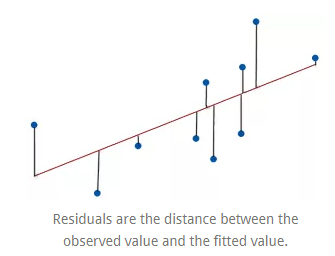

MODEL COEFFECIENTS

These values show how each input feature (like fan usage, AC usage, or tariff rate) affects the predicted bill.

Positive values mean the bill increases with more usage

Negative values mean a decrease (or weak/no relationship)

The strongest effects came from:

Monthly Appliance Usage Hours → the most influential factor

Tariff Rate → higher cost per unit means a higher bill

Smaller or near-zero coefficients (like for Monitor or Pump) show that those appliances had little impact.



# Pkl files

In this project, we trained a machine learning model that can predict electricity bills based on appliance usage. But once the model is trained, we don’t want to retrain it every time we run the app.

That’s where .pkl files come in.

✅ What Is a .pkl File?
A .pkl (or pickle) file is a way to save a trained machine learning model so that we can reuse it later without training it again.

Think of it like saving progress in a game — the model has already learned the patterns, and we’re just storing that "learning" to load and use whenever we want.

🛠 Why We Use It in This Project
We're using .pkl to:

Save the trained model once

Load it instantly in our Streamlit app

Make predictions based on new user input, without retraining

This makes the app:

✅ Faster to load

✅ Easier to deploy

✅ More efficient and reliable

🌐 In Streamlit
When we host the project with Streamlit, the .pkl file is loaded automatically at the start. That way, the model is ready to make predictions as soon as the user enters their data — no waiting, no retraining.



In [22]:
import joblib

# Save your trained model
joblib.dump(model, 'electricity_model.pkl')


['electricity_model.pkl']

In [23]:
from google.colab import files
files.download('electricity_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **✅ Summary**


The model performs very accurately

It identifies the key drivers of electricity bills

It is reliable enough to be used in real-world scenarios, like forecasting monthly costs or helping households understand their usage.